# First code 

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


https://ipython-books.github.io/101-analyzing-the-frequency-components-of-a-signal-with-a-fast-fourier-transform/

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

Data = cortex préfrontal eeg 

## Question : 
- nb mesure par secondes ? 
- Echelle de temps 
- Ordre ? fft -> heatmap des Hz en fct de quoi -> PSD
- Heatmap (x=Hz & y=) 

In [20]:
time = 1 # in seconds
unit_time = 's'
sampling_rate = 250 # in seconds
time = 1/sampling_rate
unit_time = 's'

In [21]:
df = pd.read_csv('../../data/EEGArchi13mPFC.txt')
# df = df.iloc[:3000]
df['time'] = df.index * time
df.rename(columns={'0': 'µV'}, inplace=True)

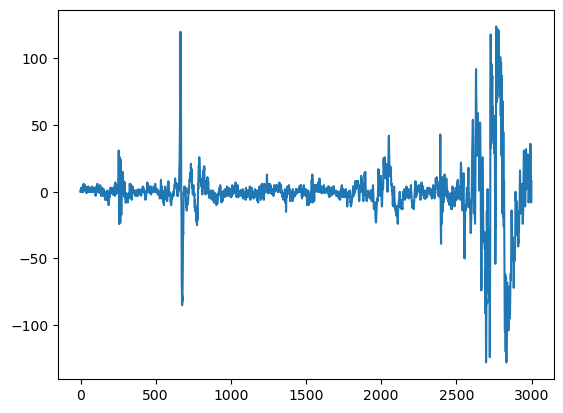

In [46]:
plt.plot(df['time'], df['µV'])

## Fourier transform

Text(0.5, 1.0, 'Fourier transform of the EEG signal')

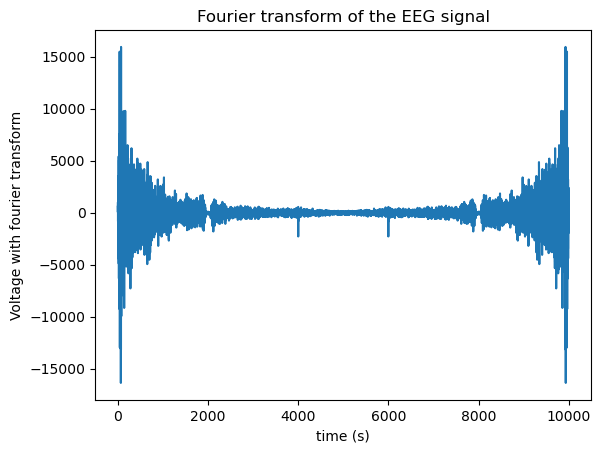

In [44]:
import scipy as sp 
import scipy.fftpack

df_f = df.copy()
df_f['µV'] = sp.fftpack.fft(df_f['µV'])
plt.plot(df_f['time'], df_f['µV'])
plt.xlabel(f'time ({unit_time})')
plt.ylabel('Voltage with fourier transform')
plt.title('Fourier transform of the EEG signal')

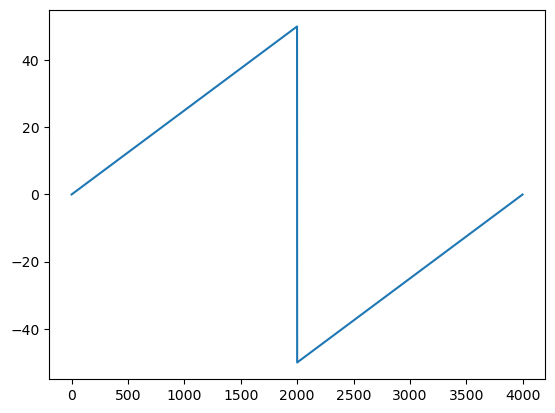

In [37]:
fs = 100 # sampling frequency = nb measurements per second
df_f['freq'] = sp.fftpack.fftfreq(df_f.shape[0]) * fs 
plt.plot(df_f['time'], df_f['freq'])

### power spectral density (PSD)

The power spectral density (PSD) of the signal describes the power present in the signal as a function of frequency, per unit frequency. Power spectral density is commonly expressed in watts per hertz (W/Hz). https://en.wikipedia.org/wiki/Spectral_density#:~:text=The%20power%20spectral%20density%20(PSD)%20of%20the%20signal%20describes%20the,hertz%20(W%2FHz).

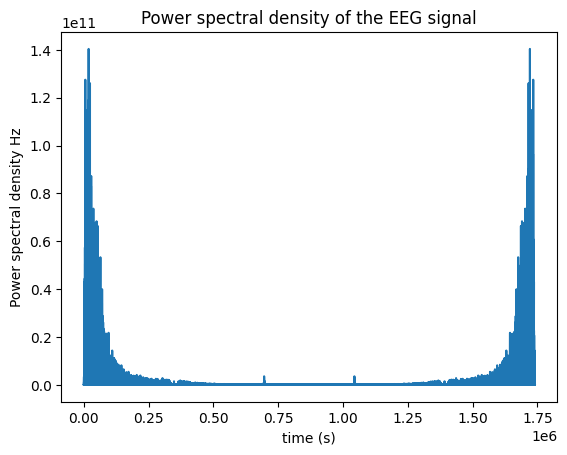

In [23]:
import numpy as np 
df_f["psd"] = np.abs(df_f["µV"]) ** 2
plt.plot(df_f['time'], df_f['psd'])
plt.xlabel(f'time ({unit_time})')
plt.ylabel('Power spectral density Hz')
plt.title('Power spectral density of the EEG signal')
plt.savefig('figures/psd.png')

Heatmap 

En Hz 

Puis distinguer en fct des ondes

array([[<AxesSubplot:title={'center':'psd'}>]], dtype=object)

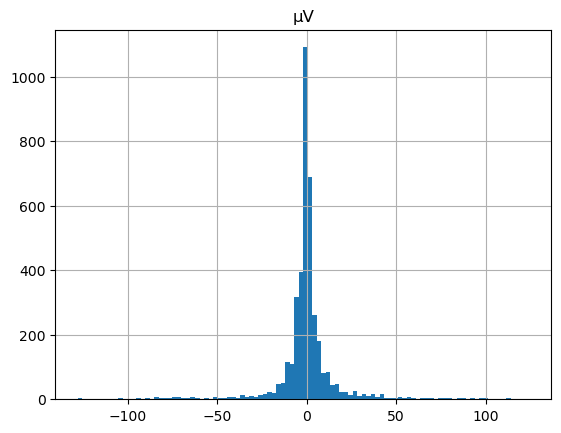

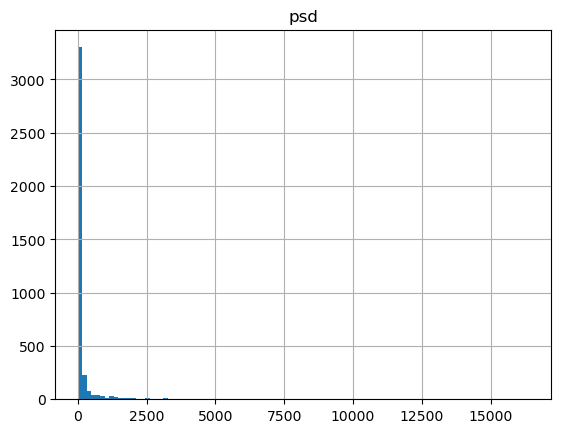

In [39]:
df_f.hist(column='µV', bins=100)
df_f.hist(column='psd', bins=100)

Text(0.5, 1.0, 'Frequency domain with fourier transform')

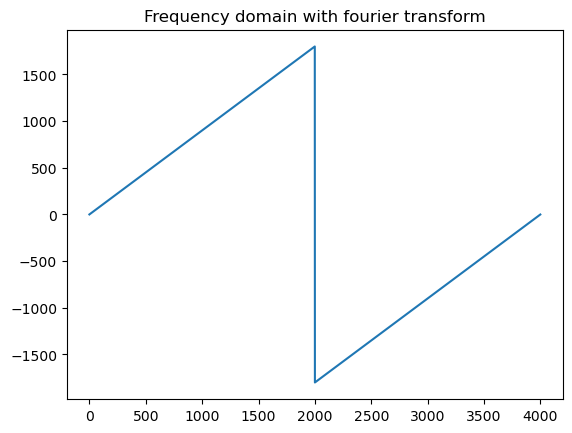

In [40]:
df_f["fftfreq"] = sp.fftpack.fftfreq(df_f.shape[0], 1. / (60*60))
plt.plot(df_f['time'], df_f['fftfreq'])
plt.title('Frequency domain with fourier transform')